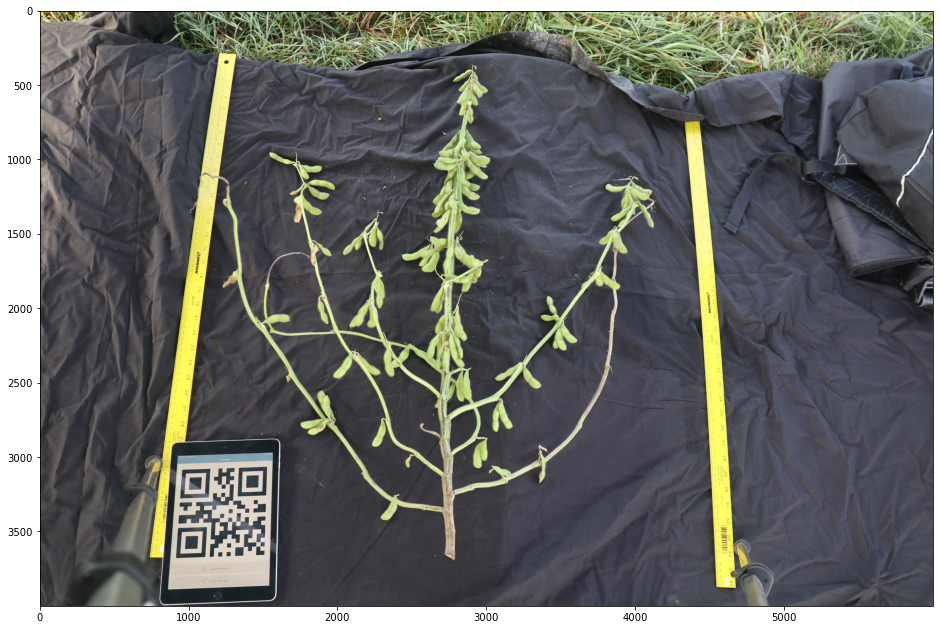

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import os
figsize(16, 12)
from pyzbar import pyzbar
import argparse
src = cv2.imread('../RawData/09302020_day_2/IMG_0713.JPG')
src_rgb = cv2.cvtColor(src.copy(), cv2.COLOR_BGR2RGB)
plt.imshow(src_rgb)

In [2]:
detector = cv2.QRCodeDetector()
# detect and decode
data, vertices_array, binary_qrcode = detector.detectAndDecode(src)
# if there is a QR code
# print the data
if vertices_array is not None:
    print("QRCode data:")
    print(data)
else:
    print("There was some error")

QRCode data:



In [3]:
barcodes = pyzbar.decode(src)

[INFO] Found QRCODE barcode: Edm5,1a Edm5,1a


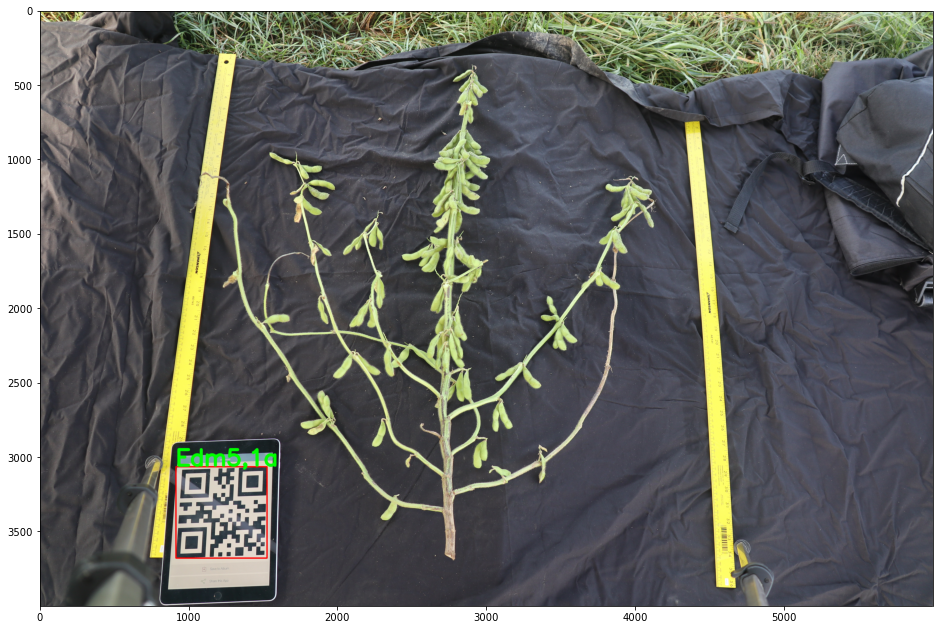

In [4]:
# loop over the detected barcodes
image = src_rgb
for barcode in barcodes:
	# extract the bounding box location of the barcode and draw the
	# bounding box surrounding the barcode on the image
	(x, y, w, h) = barcode.rect
	cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 8)
	# the barcode data is a bytes object so if we want to draw it on
	# our output image we need to convert it to a string first
	barcodeData = barcode.data.decode("utf-8")
	barcodeType = barcode.type
	# draw the barcode data and barcode type on the image
	text = "{} ({})".format(barcodeData, barcodeType)
	cv2.putText(image, barcodeData, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
		5, (0, 255, 0), 20)
	# print the barcode type and data to the terminal
	print("[INFO] Found {} barcode: {}".format(barcodeType, barcodeData),barcodeData)

# show the output image
plt.imshow(image)

In [5]:
def QRscaner(image):
    src = cv2.imread(image)
    barcodes = pyzbar.decode(src)
    for barcode in barcodes:
        barcodeData = barcode.data.decode("utf-8")
        print(barcodeData)
    if barcodes is None:
        detector = cv2.QRCodeDetector()
        data, vertices_array, binary_qrcode = detector.detectAndDecode(src)
        barcodeData = data
    return barcodeData


def batchProcessing(inputDir,outputDir):
    imread_failed = []
    for (path,dirname,filenames) in os.walk(inputDir):
        for image in filenames:
            if image.endswith('.JPG'):
                try:
                    src = path + image
                    barcodeData = QRscaner(src)          
                except:
                    imread_failed.append(image)
            else:
                continue

    print("Failed images: ",imread_failed)

In [6]:
batchProcessing('../RawData/09302020_day_2/','../testForQR/')

0032921207473
Edm5,31,a
Edm5,31,b
0032921207473
0032921207473
Edm5,1a
0032921021413
Edm5,2,b
Edm5,8,b
Edm5,2,a
Edm5,9,a
Edm5,9,b
Edm5,6,b
Edm5,4,a
Edm5,8,a
Edm5,1o,b
Edm5,7,b
Edm5,4,b
Edm5,12,b
0032921207473
0038921201473
0032921001453
Failed images:  ['IMG_0799.JPG', 'IMG_0772.JPG', 'IMG_0766.JPG', 'IMG_0809.JPG', 'IMG_0821.JPG', 'IMG_0835.JPG', 'IMG_0834.JPG', 'IMG_0820.JPG', 'IMG_0808.JPG', 'IMG_0767.JPG', 'IMG_0773.JPG', 'IMG_0798.JPG', 'IMG_0765.JPG', 'IMG_0771.JPG', 'IMG_0759.JPG', 'IMG_0836.JPG', 'IMG_0822.JPG', 'IMG_0837.JPG', 'IMG_0758.JPG', 'IMG_0770.JPG', 'IMG_0764.JPG', 'IMG_0760.JPG', 'IMG_0833.JPG', 'IMG_0827.JPG', 'IMG_0826.JPG', 'IMG_0832.JPG', 'IMG_0761.JPG', 'IMG_0749.JPG', 'IMG_0788.JPG', 'IMG_0777.JPG', 'IMG_0763.JPG', 'IMG_0824.JPG', 'IMG_0830.JPG', 'IMG_0818.JPG', 'IMG_0819.JPG', 'IMG_0825.JPG', 'IMG_0762.JPG', 'IMG_0776.JPG', 'IMG_0789.JPG', 'IMG_0842.JPG', 'IMG_0738.JPG', 'IMG_0841.JPG', 'IMG_0840.JPG', 'IMG_0717.JPG', 'IMG_0850.JPG', 'IMG_0844.JPG', 'IMG_0845.J

In [ ]:
count_ready = 0    
inputDir = '../CroppedImageData/Crop_batch4/'
for (path,dirname,filenames) in os.walk(inputDir):
    for image in filenames:
        if image.endswith('.JPG'):
    